In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from scipy import stats

## Classification Part

In [0]:
def entropysplit(xtr,ytr):
    # xtr : nxd
    # ytr : nx1
    n = xtr.shape[0]
    dim = xtr.shape[1]
    
    IG = 0 #Information Gain set to 0 initially
    final_entropy = 0
    final_cut = 0
    final_dim = 0
    lst = []
    
    ytr = ytr.reshape(-1)
    _,uniq = np.unique(ytr,return_counts = True)
    tot = np.sum(uniq)
    pk = uniq/tot
    init_entropy = -1*np.sum(pk*np.log2(pk))
    
    if(init_entropy == 0):
        return (-1,-1)
    
    
    for d in range(dim):
        x = xtr[:,d]
        ind = np.argsort(x)
        x = x[ind]
        y = ytr[ind]
        for i in range(len(x)-1):
            cut = x[i]
            ii = (x > cut)
            ynew = y[ii]
            sR = len(ynew)/n
            sL = 1 - sR
            _,c = np.unique(ynew,return_counts = True)
            tot = np.sum(c)
            pk = c/tot
            eR = -1*np.sum(pk*np.log2(pk))
            
            ii = (x <= cut)
            ynew = y[ii]
            _,c = np.unique(ynew,return_counts = True)
            tot = np.sum(c)
            pk = c/tot
            eL = -1*np.sum(pk*np.log2(pk))
            
            entropy = sR*eR + sL*eL
            lst.append(entropy)
            check = init_entropy - entropy
            
            if check > IG:
                IG = check 
                final_entropy = entropy
                final_cut = cut
                final_dim = d
                
    return final_cut,final_dim

In [0]:
def tree(xtr,ytr, t, lst, maxdepth = 1000, index = 0):
    # xtr : nxd
    # ytr : nx1
    # t : Matrix of Trees
    # lst : list of child names
    ytr = ytr.reshape(-1)
    mod = stats.mode(ytr)[0]
    t[0,index] = mod
    cut,dim = entropysplit(xtr,ytr)
    if dim ==-1:
        t[1,index] = 0
        t[2,index] = 0
        t[3,index] = 0
        t[4,index] = 0
        return
    if index  >= maxdepth:
        return
    t[1,index] = dim
    t[2,index] = cut
    ii = np.where(xtr[:,dim]>cut,True,False)
    x = xtr[ii]
    y = ytr[ii]
    
    
    ii1 = np.where(xtr[:,dim]<=cut,True,False)
    x1 = xtr[ii1]
    y1 = ytr[ii1]
    
    t[3,index] = lst.pop(0) # right child index
    t[4,index] = lst.pop(0) # left child index
    
    tree(x, y, t, lst, maxdepth, index = int(t[3,index]))
    tree(x1, y1, t, lst, maxdepth, index = int(t[4,index]))
    return t

In [0]:
def evaluate(t, xte, yte): 
    # t : Tree Matrix
    # xte : nxd ---> test set
    n = xte.shape[0]
    ypred = np.zeros((n,1))
    for i in range(n):
        index = 0
        while True:
            if t[3,index] == 0:
                ypred[i] = t[0,index]
                break
            else:
                if xte[i,int(t[1,index])] > t[2,index]:
                    index = int(t[3,index])
                else:
                    index = int(t[4,index])
    
    ypred = ypred.reshape(-1)
    yte = yte.reshape(-1)
    acc = np.sum(ypred == yte)/(len(ypred))
    return (1-acc),ypred

## TESTING TREE

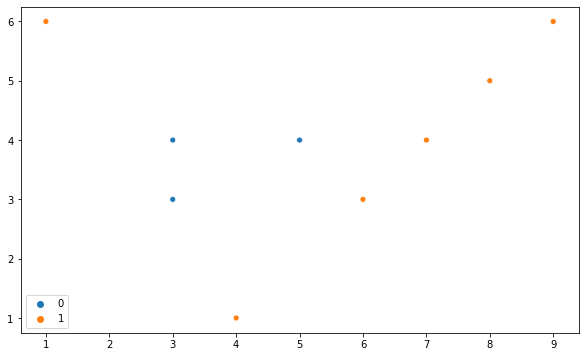

In [68]:
## Training Data
xp = np.array([[1,6],[3,3],[3,4],[4,1],[5,4],[6,3],[7,4],[8,5],[9,6]])
yp = np.array([1,0,0,1,0,1,1,1,1]) 

## Test data

xtep = np.array([[7,7],[0.25,2],[4,6]])
ytep = np.array([1,1,0])

## plot
plt.subplots(figsize = (10,6))
sns.scatterplot(xp[:,0],xp[:,1],hue = yp)

In [69]:
lst = [x+1 for x in range(2*maxdepth)]
tp = tree(xp,yp,np.zeros((5,12)),lst)
evaluate(tp,xtep,ytep)

(0.0, array([1., 1., 0.]))

In [0]:
def plotting(t,xp,yp):
  plt.subplots(figsize = (10,6))
  sns.scatterplot(xp[:,0],xp[:,1],hue = yp)
  col = t.shape[1]
  for i in range(col):
    if t[4,i] == 0:
      continue
    else:
      d = t[1,i]
      c = t[2,i]
      lim = np.linspace(0.1,10,10)
      c = c*(lim/lim)
      if d == 0:
        plt.plot(c,lim,'--')
      else:
        plt.plot(lim,c,'--')


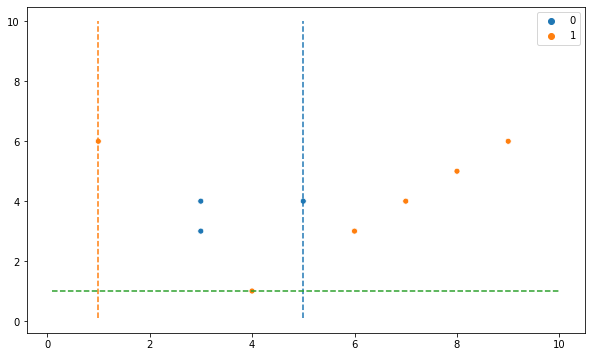

In [71]:
plotting(tp,xp,yp)

In [72]:
dat = loadmat("/content/ion.mat")
xtr = dat['xTr']
ytr = dat['yTr']
yte = dat['yTe']
xte = dat['xTe']
xtr = xtr.reshape(281,34)
xte = xte.reshape(70,34)


n = xtr.shape[0]
lst = [x+1 for x in range(1000)]
t = np.zeros((5,n*3))


t = tree(xtr,ytr,t,lst)
err,_ = evaluate(t,xte,yte)


print("The test error is:",err)

The test error is: 0.4285714285714286
